# **BASE CODE — Quantum Teleportation**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Initial state of qubit 0:


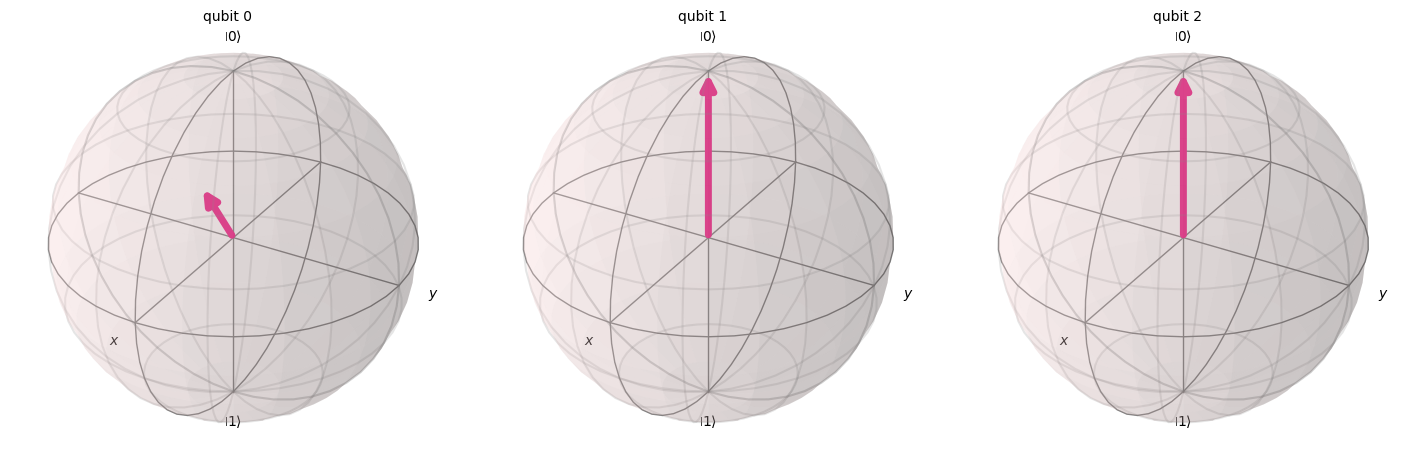

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


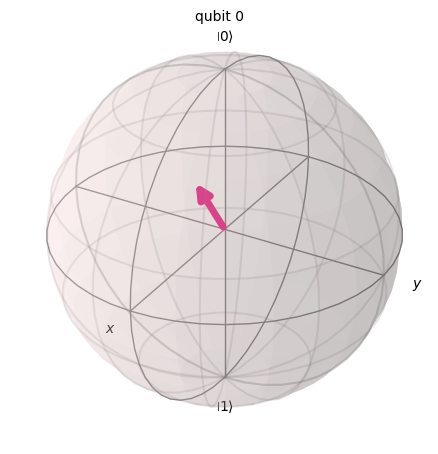

In [1]:
!pip install qiskit --quiet
!pip install qiskit_aer --quiet
!pip install pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement (coherent version)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = Statevector(result.data(0)["statevector"])

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

print("\nBob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))


# **Task 1: Custom State Teleportation (vary θ and φ)**




θ = 0.79, φ = 1.57


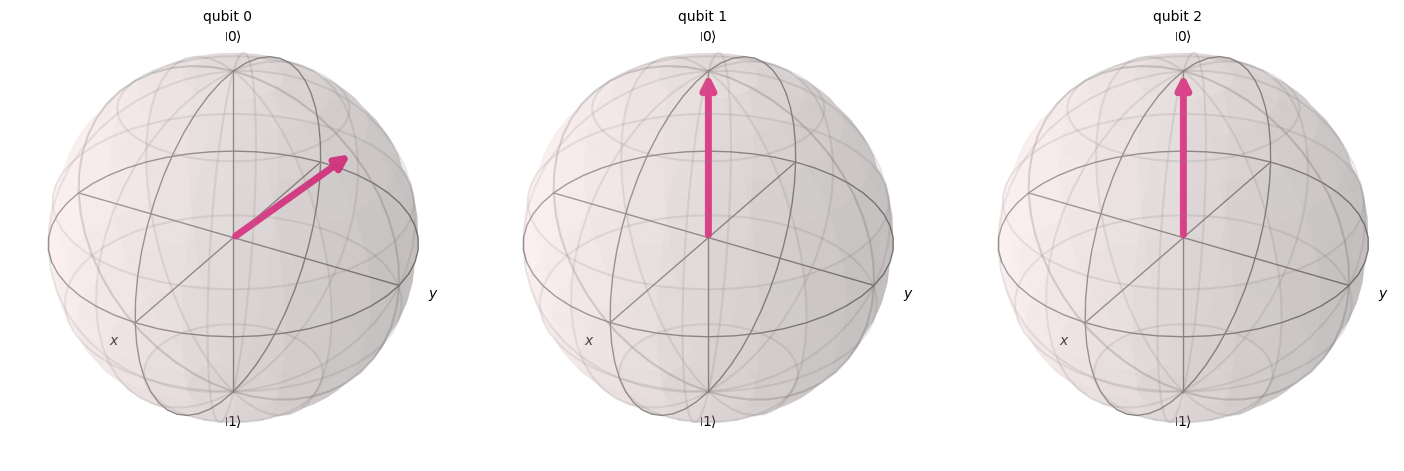


θ = 1.05, φ = 0.52


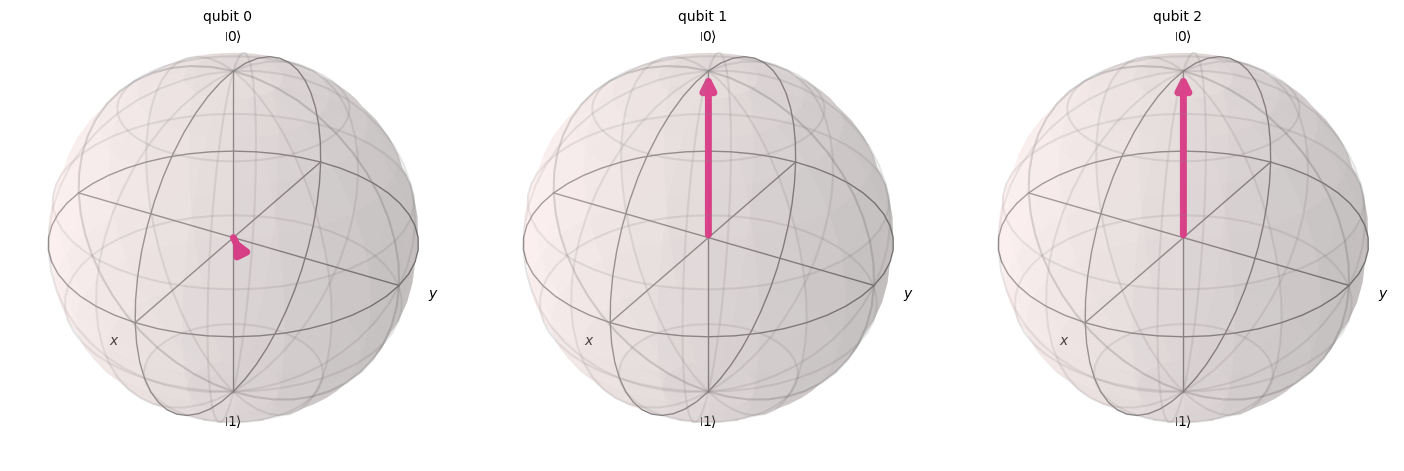


θ = 1.57, φ = 1.05


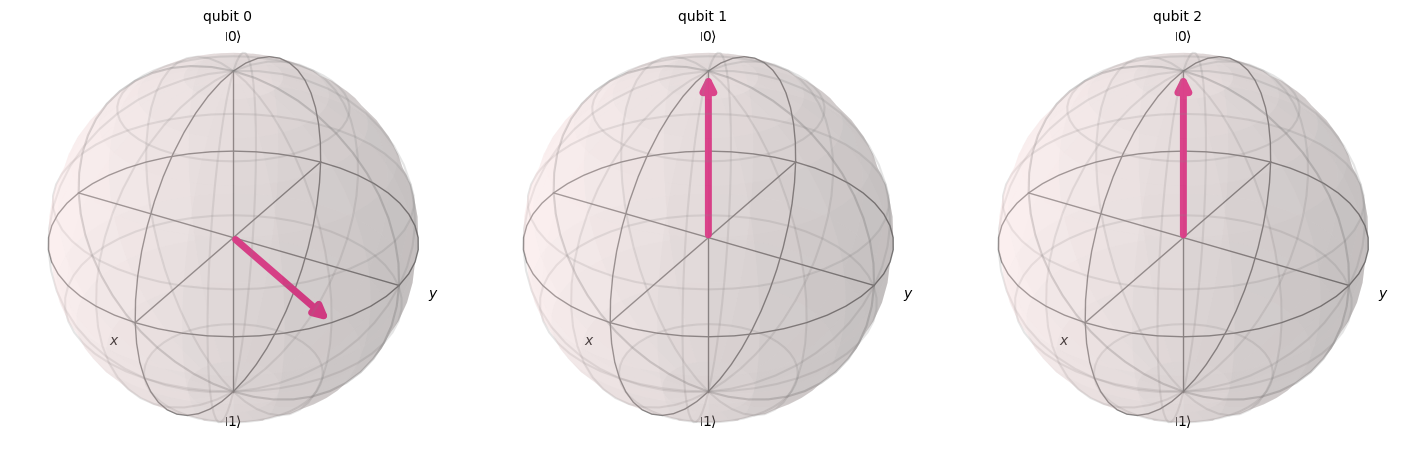

In [2]:
from math import pi

# Try different theta and phi values
angles = [(pi/4, pi/2), (pi/3, pi/6), (pi/2, pi/3)]

for theta, phi in angles:
    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)

    sv_initial = Statevector.from_instruction(qc)
    print(f"\nθ = {theta:.2f}, φ = {phi:.2f}")
    display(plot_bloch_multivector(sv_initial))


# **Task 2: Add Classical Measurement & Conditional Corrections**

✅ Teleportation complete with classical corrections (Qiskit 2.x style)!


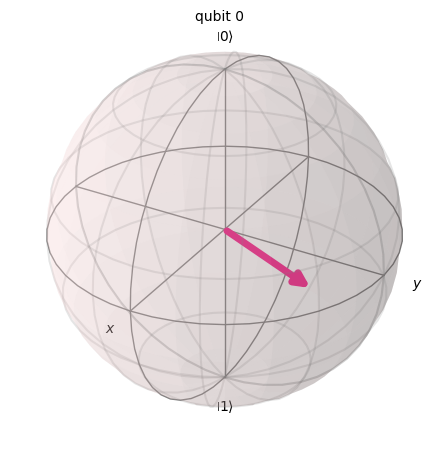

In [16]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# --- Step 1: Define registers explicitly ---
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# --- Step 2: Prepare arbitrary state |ψ⟩ on qubit 0 ---
theta, phi = 0.8, 0.3
qc.ry(theta, q[0])
qc.rz(phi, q[0])

# --- Step 3: Create Bell pair between qubits 1 and 2 ---
qc.h(q[1])
qc.cx(q[1], q[2])

# --- Step 4: Bell-basis measurement ---
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure([q[0], q[1]], [c[0], c[1]])

# --- Step 5: Conditional corrections using if_test() ---
with qc.if_test((c, 1)):  # classical bits = 01
    qc.x(q[2])

with qc.if_test((c, 2)):  # classical bits = 10
    qc.z(q[2])

with qc.if_test((c, 3)):  # classical bits = 11
    qc.x(q[2])
    qc.z(q[2])

# --- Step 6: Save final statevector ---
qc.save_statevector()

# --- Step 7: Simulate ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
sv_final = Statevector(result.data(0)["statevector"])

# --- Step 8: Extract Bob’s qubit (qubit 2) final state ---
rho_bob = partial_trace(sv_final, [0, 1])

print("✅ Teleportation complete with classical corrections (Qiskit 2.x style)!")
display(plot_bloch_multivector(rho_bob))


# **Task 3: Fidelity Analysis (Multiple Random States)**

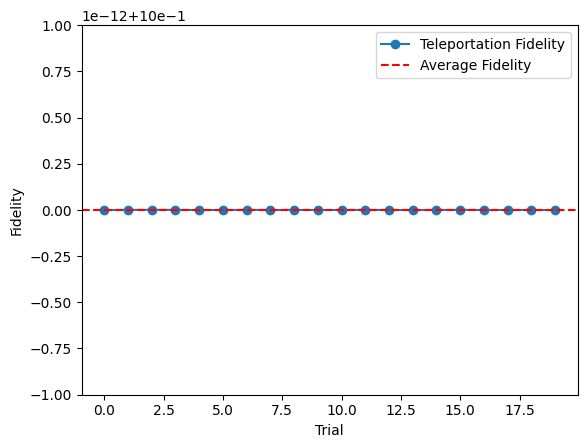

Average Fidelity: 1.000000


In [17]:
import random

def random_teleportation_fidelity():
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2*np.pi)

    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    sv_initial = Statevector.from_instruction(qc)

    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.save_statevector()

    result = AerSimulator().run(transpile(qc, AerSimulator())).result()
    sv_final = Statevector(result.data(0)['statevector'])

    rho_bob = partial_trace(sv_final, [0, 1])
    rho_init = partial_trace(sv_initial, [1, 2])
    eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
    eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
    bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
    init_state = eigvecs_i[:, np.argmax(eigvals_i)]
    return np.abs(np.vdot(init_state, bob_state)) ** 2

# Run for 20 random states
fidelities = [random_teleportation_fidelity() for _ in range(20)]
plt.plot(fidelities, 'o-', label='Teleportation Fidelity')
plt.axhline(y=np.mean(fidelities), color='r', linestyle='--', label='Average Fidelity')
plt.xlabel('Trial')
plt.ylabel('Fidelity')
plt.legend()
plt.show()

print(f"Average Fidelity: {np.mean(fidelities):.6f}")


# **Task 4: Step-by-Step Bloch Visualization**

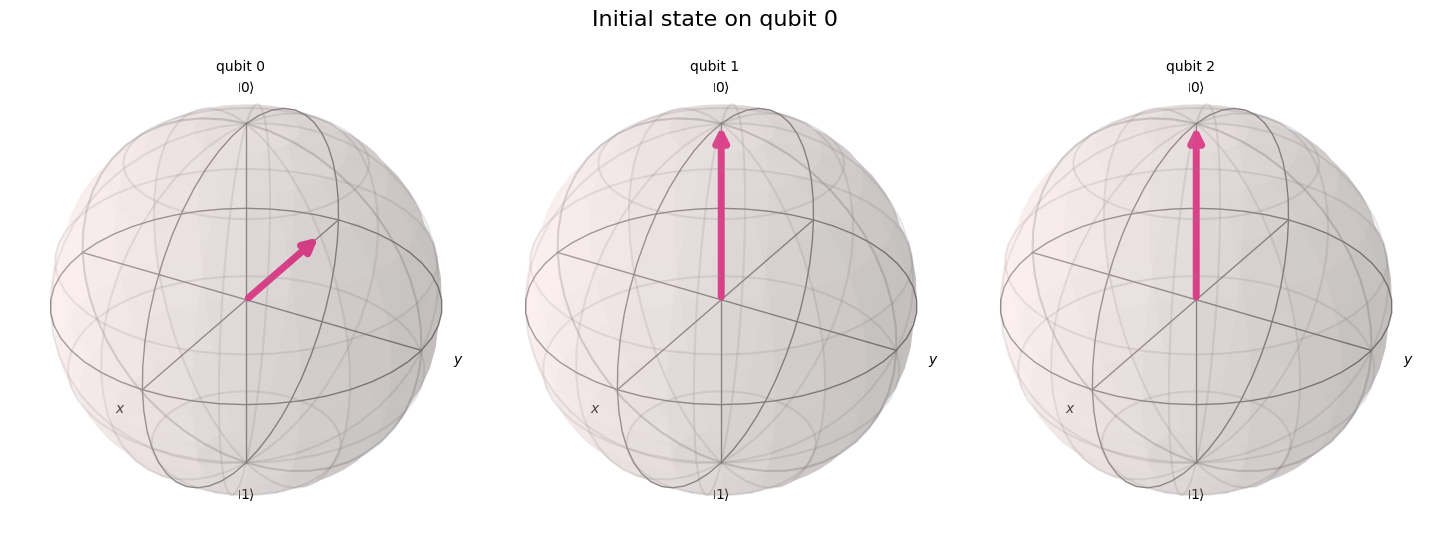

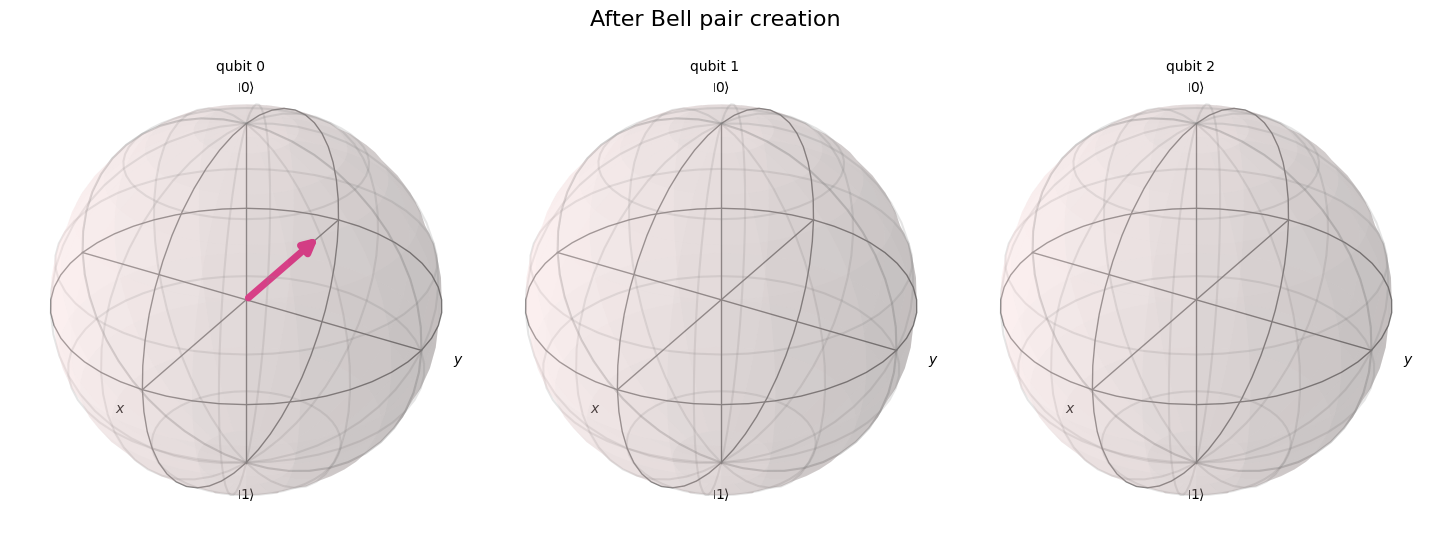

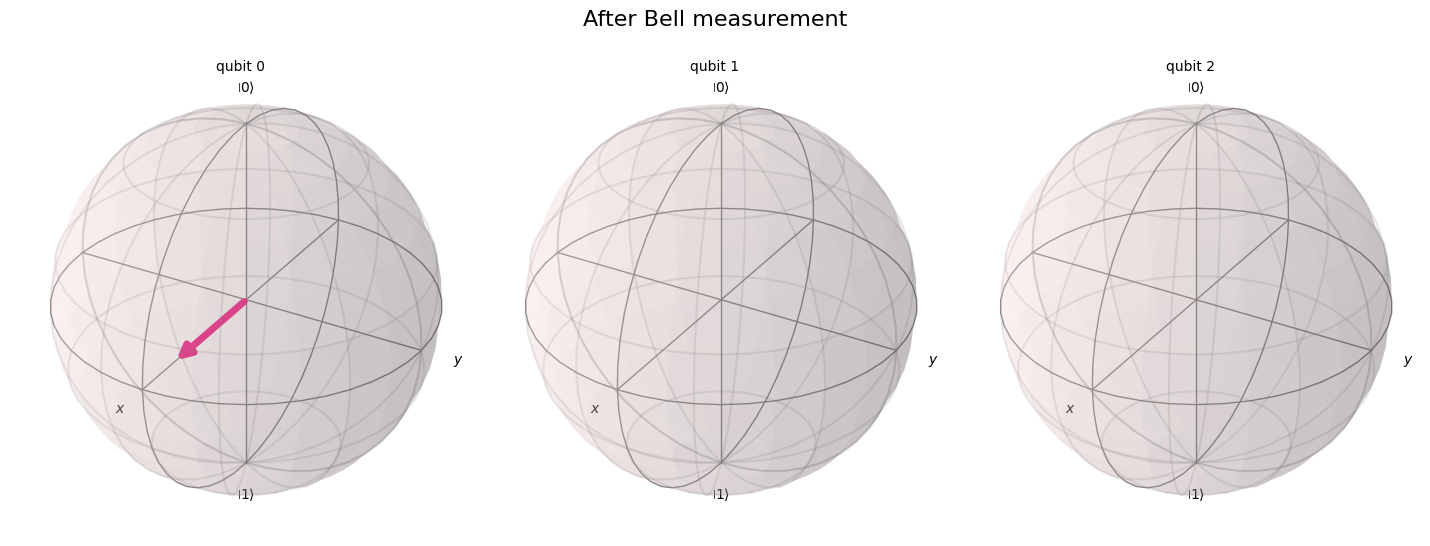

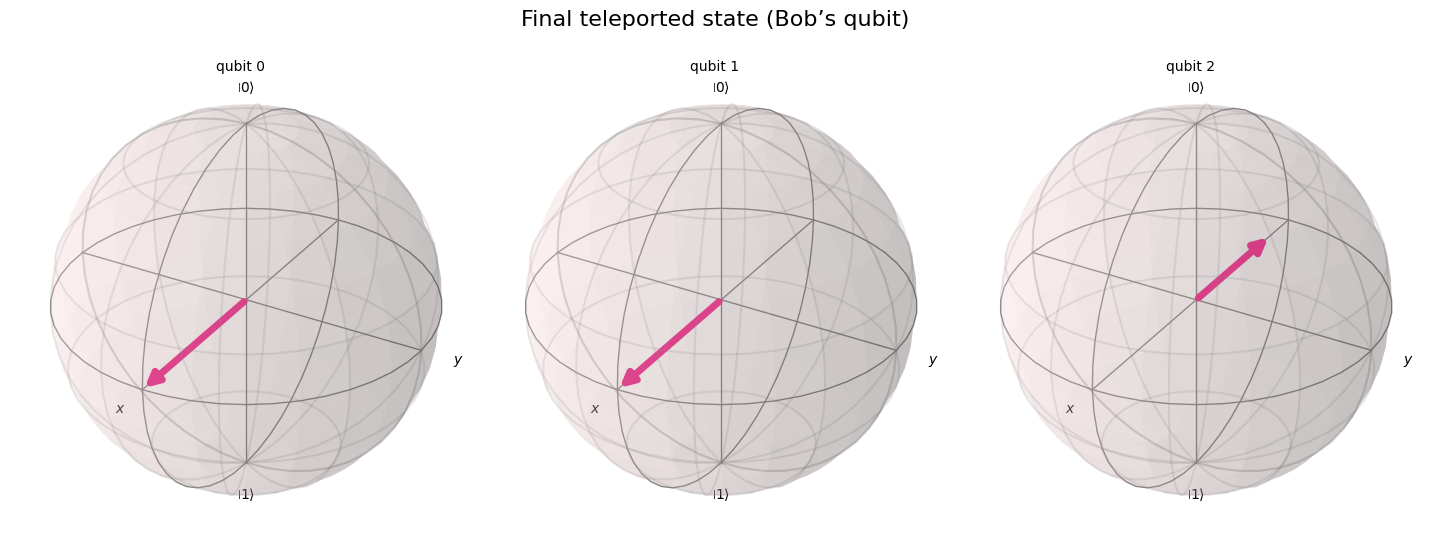

In [18]:
qc = QuantumCircuit(3)

theta, phi = np.pi/4, np.pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)
state1 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state1, title="Initial state on qubit 0"))

qc.h(1)
qc.cx(1, 2)
state2 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state2, title="After Bell pair creation"))

qc.cx(0, 1)
qc.h(0)
state3 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state3, title="After Bell measurement"))

qc.cx(1, 2)
qc.cz(0, 2)
state4 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state4, title="Final teleported state (Bob’s qubit)"))


# **Task 5: Introduce Noise Model**

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt


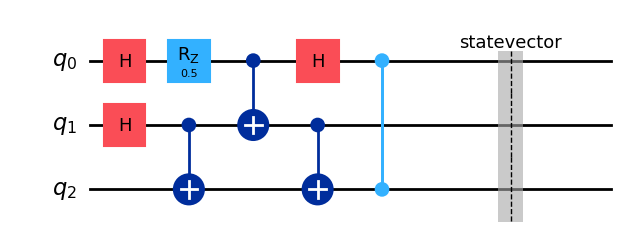

In [31]:
# Step 1: Create a 3-qubit teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state on qubit 0
qc.h(0)
qc.rz(0.5, 0)

# Create entanglement between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement between qubit 0 and 1
qc.cx(0, 1)
qc.h(0)

# Apply conditional operations on qubit 2
qc.cx(1, 2)
qc.cz(0, 2)

qc.save_statevector()  # For ideal simulation
qc.draw("mpl")



In [32]:
sim_ideal = AerSimulator(method='statevector')
result_ideal = sim_ideal.run(transpile(qc, sim_ideal)).result()

sv_ideal = Statevector(result_ideal.data(0)['statevector'])
rho_bob_ideal = partial_trace(sv_ideal, [0, 1])
print("Ideal Teleported State (Bob's Qubit):")
print(rho_bob_ideal)
plot_state_city(rho_bob_ideal, title="Bob's Qubit (Ideal)")
plt.show()


Ideal Teleported State (Bob's Qubit):
DensityMatrix([[0.5       +0.j        , 0.43879128-0.23971277j],
               [0.43879128+0.23971277j, 0.5       +0.j        ]],
              dims=(2,))


In [33]:
# Create realistic noise model
error_1 = noise.depolarizing_error(0.02, 1)
error_2 = noise.depolarizing_error(0.04, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['h', 'x', 'rz', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Create simulator with noise
sim_noisy = AerSimulator(noise_model=noise_model)

# Save density matrix instead of statevector (mixed states!)
qc_noisy = qc.copy()
qc_noisy.remove_final_measurements()  # remove any measurement if added
qc_noisy.save_density_matrix()

result_noisy = sim_noisy.run(transpile(qc_noisy, sim_noisy)).result()
rho_noisy = DensityMatrix(result_noisy.data(0)['density_matrix'])

rho_bob_noisy = partial_trace(rho_noisy, [0, 1])
print("Noisy Teleported State (Bob's Qubit):")
print(rho_bob_noisy)
plot_state_city(rho_bob_noisy, title="Bob's Qubit (Noisy)")
plt.show()


Noisy Teleported State (Bob's Qubit):
DensityMatrix([[0.5       +0.j        , 0.31538123-0.18821198j],
               [0.31538123+0.18821198j, 0.5       +0.j        ]],
              dims=(2,))
